<a href="https://colab.research.google.com/github/goyaldivyansh/Investment-option-Predication/blob/main/Investment_options_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np   #array lists in python
import pandas as pd 
import missingno as msno
import plotly.express as px
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading data
from google.colab import drive
drive.mount('/content/drive')
invest_data = pd.read_csv('/content/drive/MyDrive/invest.csv')

Mounted at /content/drive


In [3]:
invest_data.head()

GENDER  AGE Do you invest in Investment Avenues?  \
0   Male   50                                   No   
1   Male   54                                  Yes   
2   Male   43                                  Yes   
3   Male   34                                  Yes   
4   Male   48                                  Yes   

   What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]  \
0                                                  2                                                               
1                                                  4                                                               
2                                                  5                                                               
3                                                  1                                                               
4                                                  4                                                               

   What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market]  \
0                                                  8                                                                
1                                                  2                                                                
2                                                  1                                                                
3                                                  8                                                                
4                                                  6                                                                

   What do you think are the best options for investing your money? (Rank in order of preference) [Debentures]  \
0                                                  6                                                             
1                                                  7                                                             
2                                                  6                                                             
3                                                  6                                                             
4                                                  5                                                             

   What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds]  \
0                                                  3                                                                   
1                                                  6                                                                   
2                                                  7                                                                   
3                                                  4                                                                   
4                                                  7                                                                   

   What do you think are the best options for investing your money? (Rank in order of preference) [Fixed Deposits]  \
0                                                  9                                                                 
1                                                  5                                                                 
2                                                  2                                                                 
3                                                  5                                                                 
4                                                  9                                                                 

   What do you think are the best options for investing your money? (Rank in order of preference) [Public Provident Fund]  \
0                                    

In [4]:
invest_data.tail()

GENDER  AGE Do you invest in Investment Avenues?  \
99995    Male   42                                   No   
99996  Female   59                                  Yes   
99997    Male   30                                   No   
99998    Male   35                                  Yes   
99999  Female   40                                  Yes   

       What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]  \
99995                                                  2                                                               
99996                                                  4                                                               
99997                                                  9                                                               
99998                                                  5                                                               
99999                                                  7                                                               

       What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market]  \
99995                                                  5                                                                
99996                                                  7                                                                
99997                                                  7                                                                
99998                                                  2                                                                
99999                                                  9                                                                

       What do you think are the best options for investing your money? (Rank in order of preference) [Debentures]  \
99995                                                  8                                                             
99996                                                  3                                                             
99997                                                  2                                                             
99998                                                  1                                                             
99999                                                  5                                                             

       What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds]  \
99995                                                  3                                                                   
99996                                                  8                                                                   
99997                                                  6                                                                   
99998                                                  6                                                                   
99999                                                  1                                                                   

       What do you think are the best options for investing your money? (Rank in order of preference) [Fixed Deposits]  \
99995                                                  9                                                                 
99996                                                  1                                                                 
99997                                                  8                                                                 
99998                                                  7                                                                 
99999                                                  2                                                                 

       What do yo

In [5]:
invest_data.describe()

AGE  \
count  100000.000000   
mean       41.423300   
std        13.876768   
min        18.000000   
25%        29.000000   
50%        41.000000   
75%        53.000000   
max        65.000000   

       What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]  \
count                                      100000.000000                                                               
mean                                            4.998030                                                               
std                                             2.583167                                                               
min                                             1.000000                                                               
25%                                             3.000000                                                               
50%                                             5.000000                                                               
75%                                             7.000000                                                               
max                                             9.000000                                                               

       What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market]  \
count                                      100000.000000                                                                
mean                                            4.996850                                                                
std                                             2.581873                                                                
min                                             1.000000                                                                
25%                                             3.000000                                                                
50%                                             5.000000                                                                
75%                                             7.000000                                                                
max                                             9.000000                                                                

       What do you think are the best options for investing your money? (Rank in order of preference) [Debentures]  \
count                                      100000.000000                                                             
mean                                            5.002760                                                             
std                                             2.581623                                                             
min                                             1.000000                                                             
25%                                             3.000000                                                             
50%                                             5.000000                                                             
75%                                             7.000000                                                             
max                                             9.000000                                                             

       What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds]  \
count                                       100000.00000                                                                   
mean                                             5.00472                                                                   
std                                              2.58045                                                                   
min                                              1.00000              

In [6]:
invest_data.shape

(100000, 26)

In [7]:
invest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                                                                                                                  Non-Null Count   Dtype 
---  ------                                                                                                                  --------------   ----- 
 0   GENDER                                                                                                                  100000 non-null  object
 1   AGE                                                                                                                     100000 non-null  int64 
 2   Do you invest in Investment Avenues?                                                                                    100000 non-null  object
 3   What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]           100000 non-null  int

In [8]:
invest_data.isnull().sum()

GENDER                                                                                                                    0
AGE                                                                                                                       0
Do you invest in Investment Avenues?                                                                                      0
What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]             0
What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market]            0
What do you think are the best options for investing your money? (Rank in order of preference) [Debentures]               0
What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds]         0
What do you think are the best options for investing your money? (Rank in order of preference) [Fixed Deposits]           0
What do 

In [9]:
fig = px.scatter (invest_data, x = "What do you think are the best options for investing your money? (Rank in order of preference) [Debentures]", y = "What do you think are the best options for investing your money? (Rank in order of preference) [Gold]", color = "AGE", template = "plotly_dark",  trendline="lowess")
fig.show ()

In [10]:
invest_data['What do you think are the best options for investing your money? (Rank in order of preference) [Gold]'].value_counts()

3    11203
4    11198
6    11164
1    11155
9    11112
2    11102
8    11092
5    11088
7    10886
Name: What do you think are the best options for investing your money? (Rank in order of preference) [Gold], dtype: int64

<Axes: >

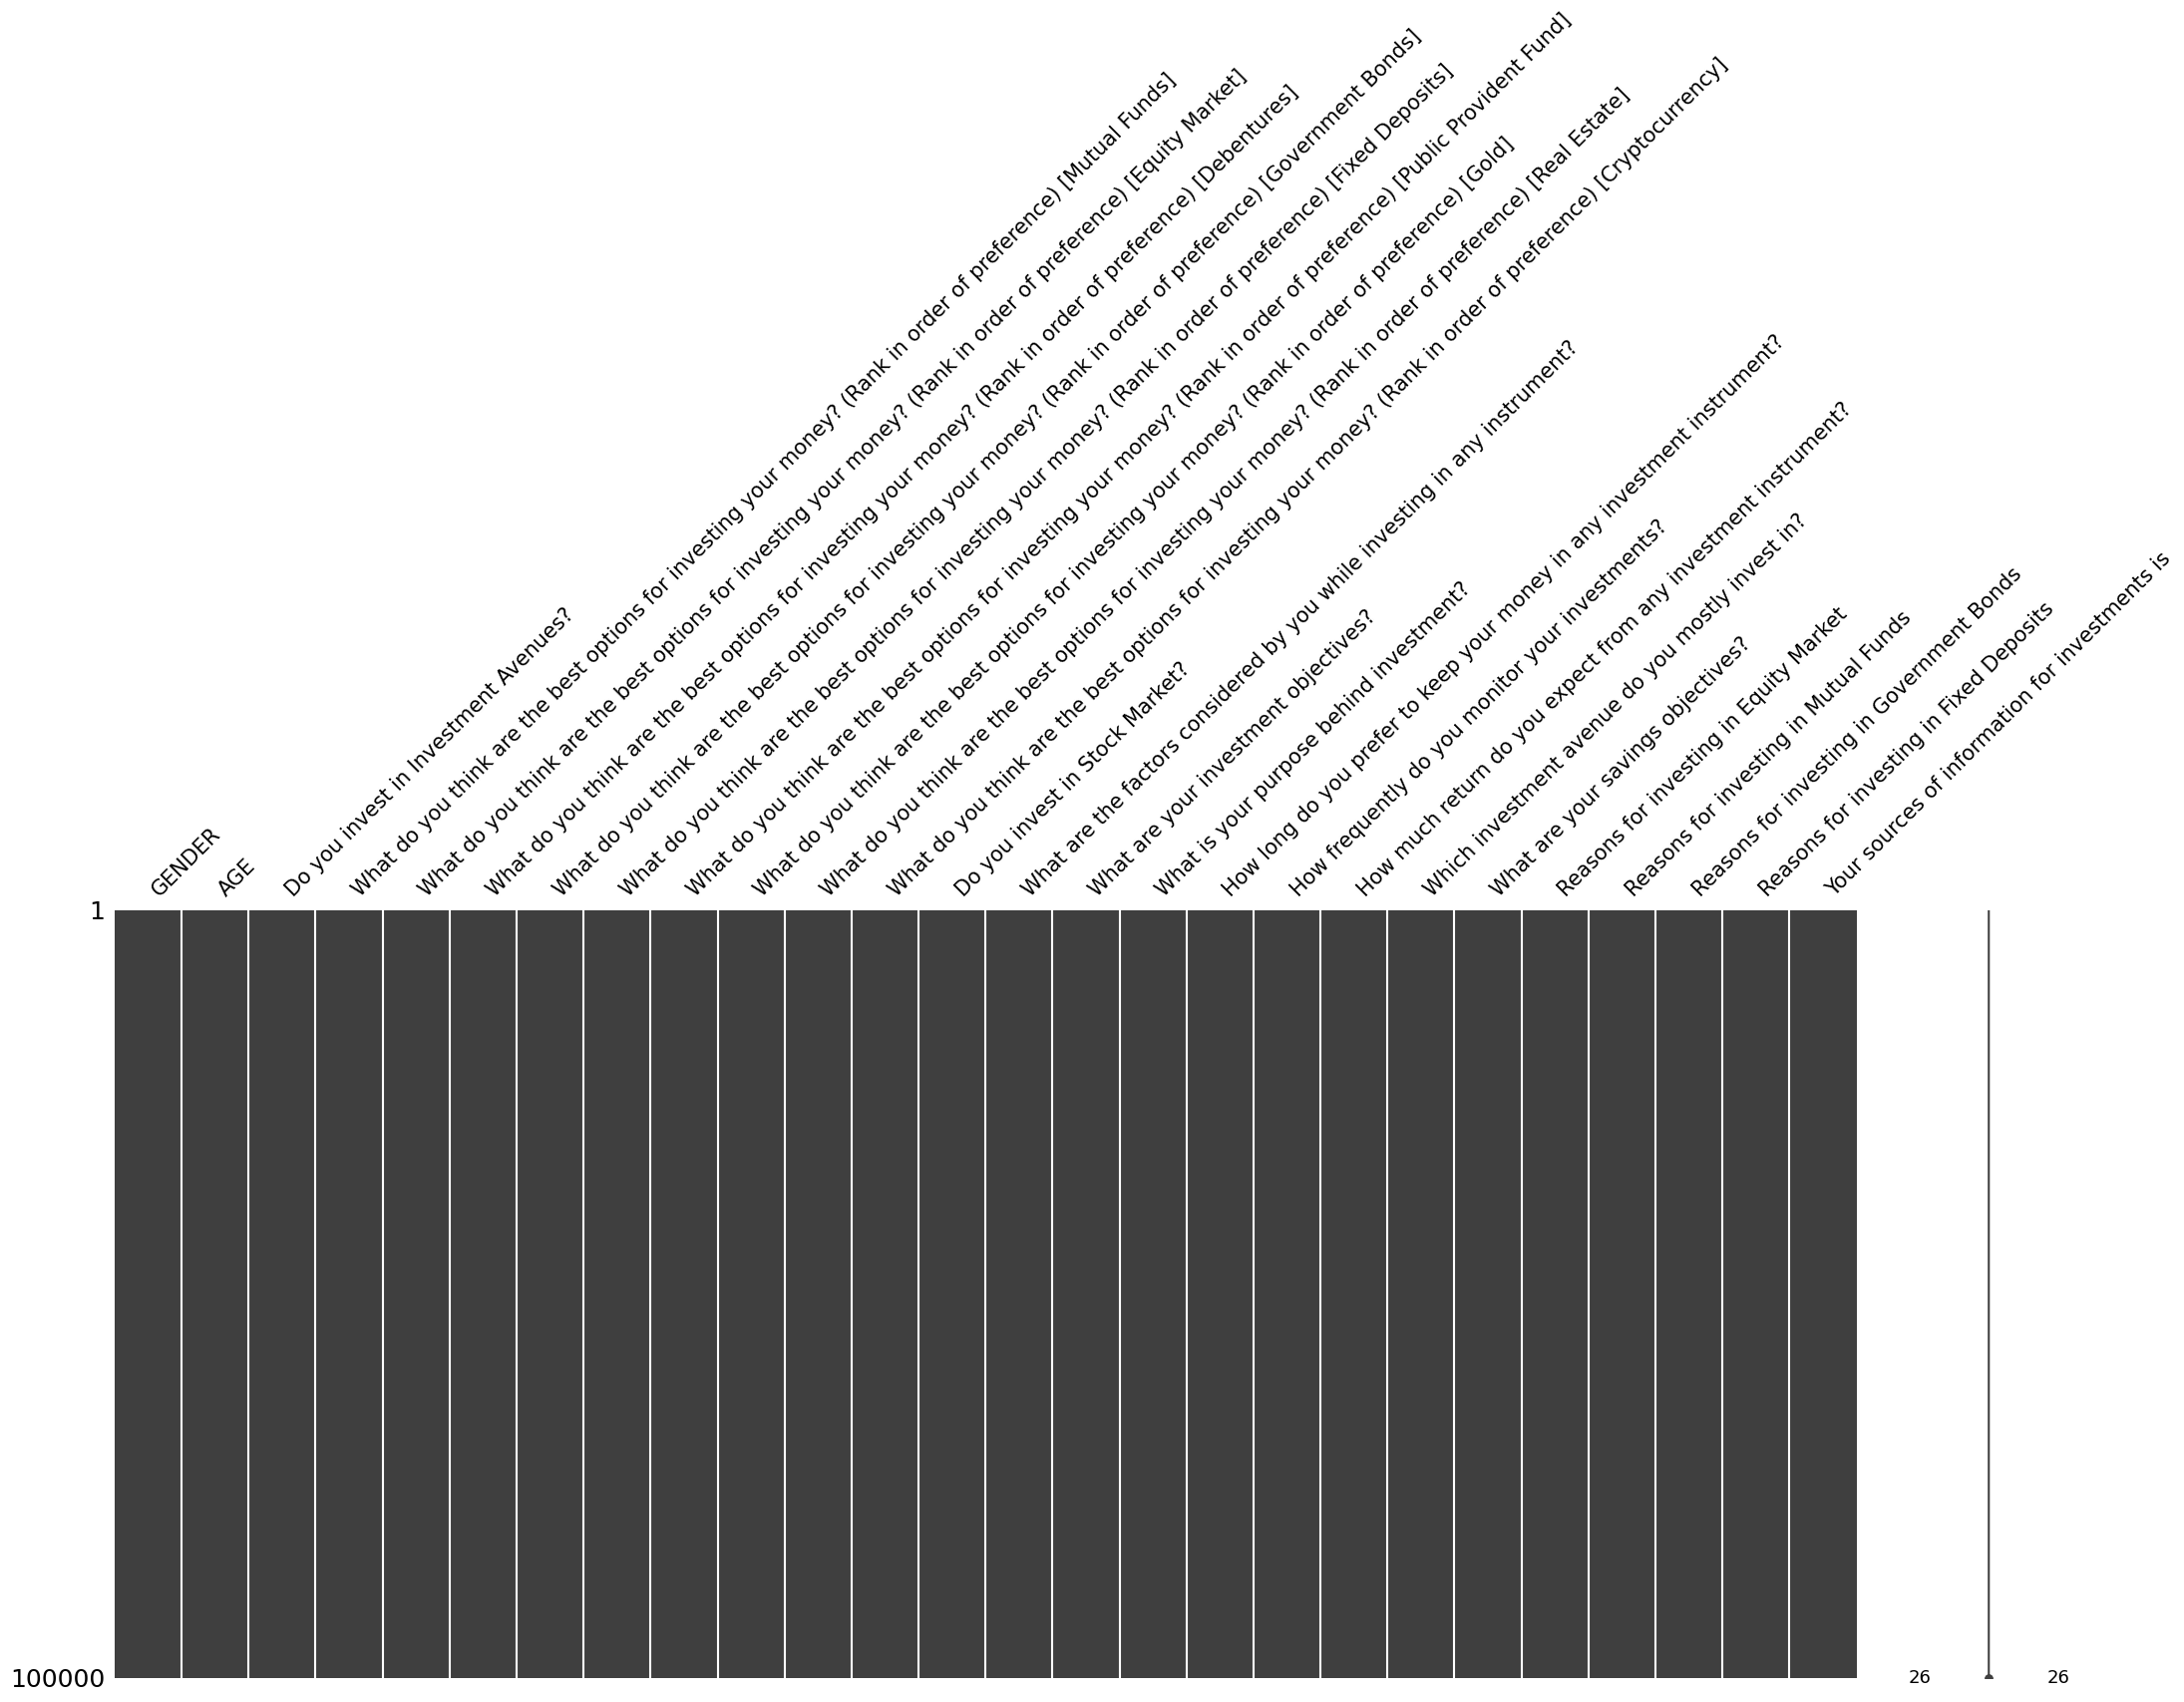

In [11]:
msno.matrix(invest_data, fontsize=15)

In [12]:
#sns.pairplot(invest_data, hue="Which investment avenue do you mostly invest in?")

In [13]:
invest_data.rename(columns = {'Which investment avenue do you mostly invest in?\t':'Which investment avenue do you mostly invest in?'}, inplace = True)
  
# After renaming the columns
print("\nAfter modifying column:\n", invest_data.columns)


After modifying column:
 Index(['GENDER', 'AGE', 'Do you invest in Investment Avenues?',
       'What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]',
       'What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market]',
       'What do you think are the best options for investing your money? (Rank in order of preference) [Debentures]',
       'What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds]',
       'What do you think are the best options for investing your money? (Rank in order of preference) [Fixed Deposits]',
       'What do you think are the best options for investing your money? (Rank in order of preference) [Public Provident Fund]',
       'What do you think are the best options for investing your money? (Rank in order of preference) [Gold]',
       'What do you think are the best options for investing you

In [14]:
fig = px.histogram(invest_data, x='Which investment avenue do you mostly invest in?')
fig.update_layout(
    title_text='Investment distribution', # title of plot
    xaxis_title_text='Value', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.1, # gap between bars of adjacent location coordinates
)
fig.show()

<Axes: xlabel='AGE', ylabel='Which investment avenue do you mostly invest in?'>

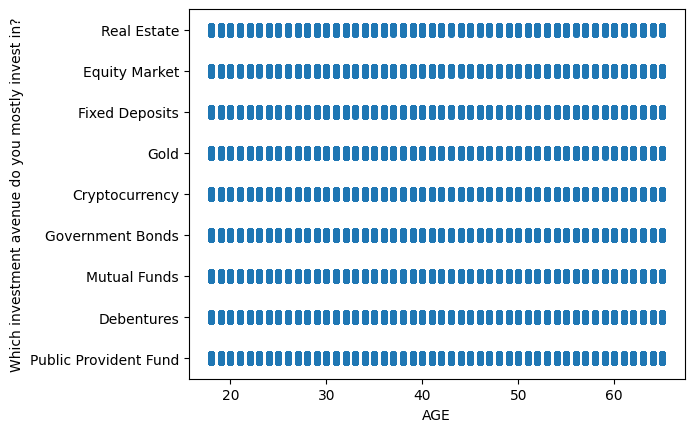

In [15]:
sns.stripplot(x='AGE', y='Which investment avenue do you mostly invest in?', data=invest_data)

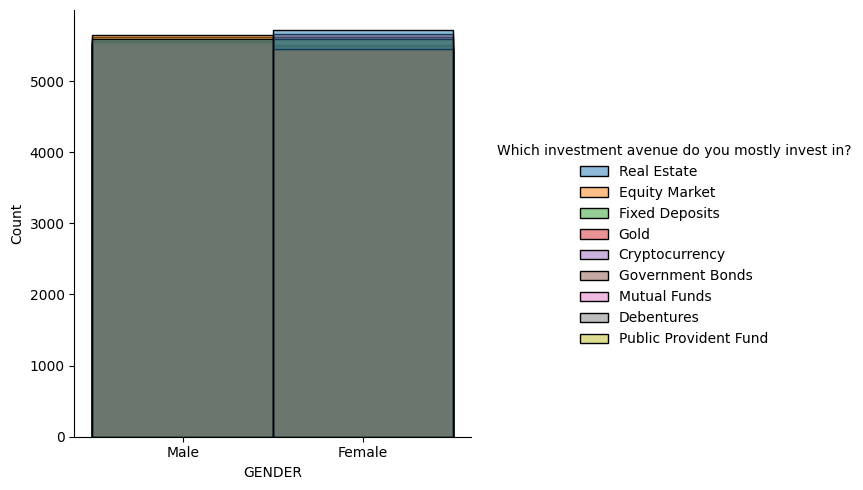

In [16]:
sns.displot(x="GENDER",data=invest_data, hue="Which investment avenue do you mostly invest in?")

<Axes: >

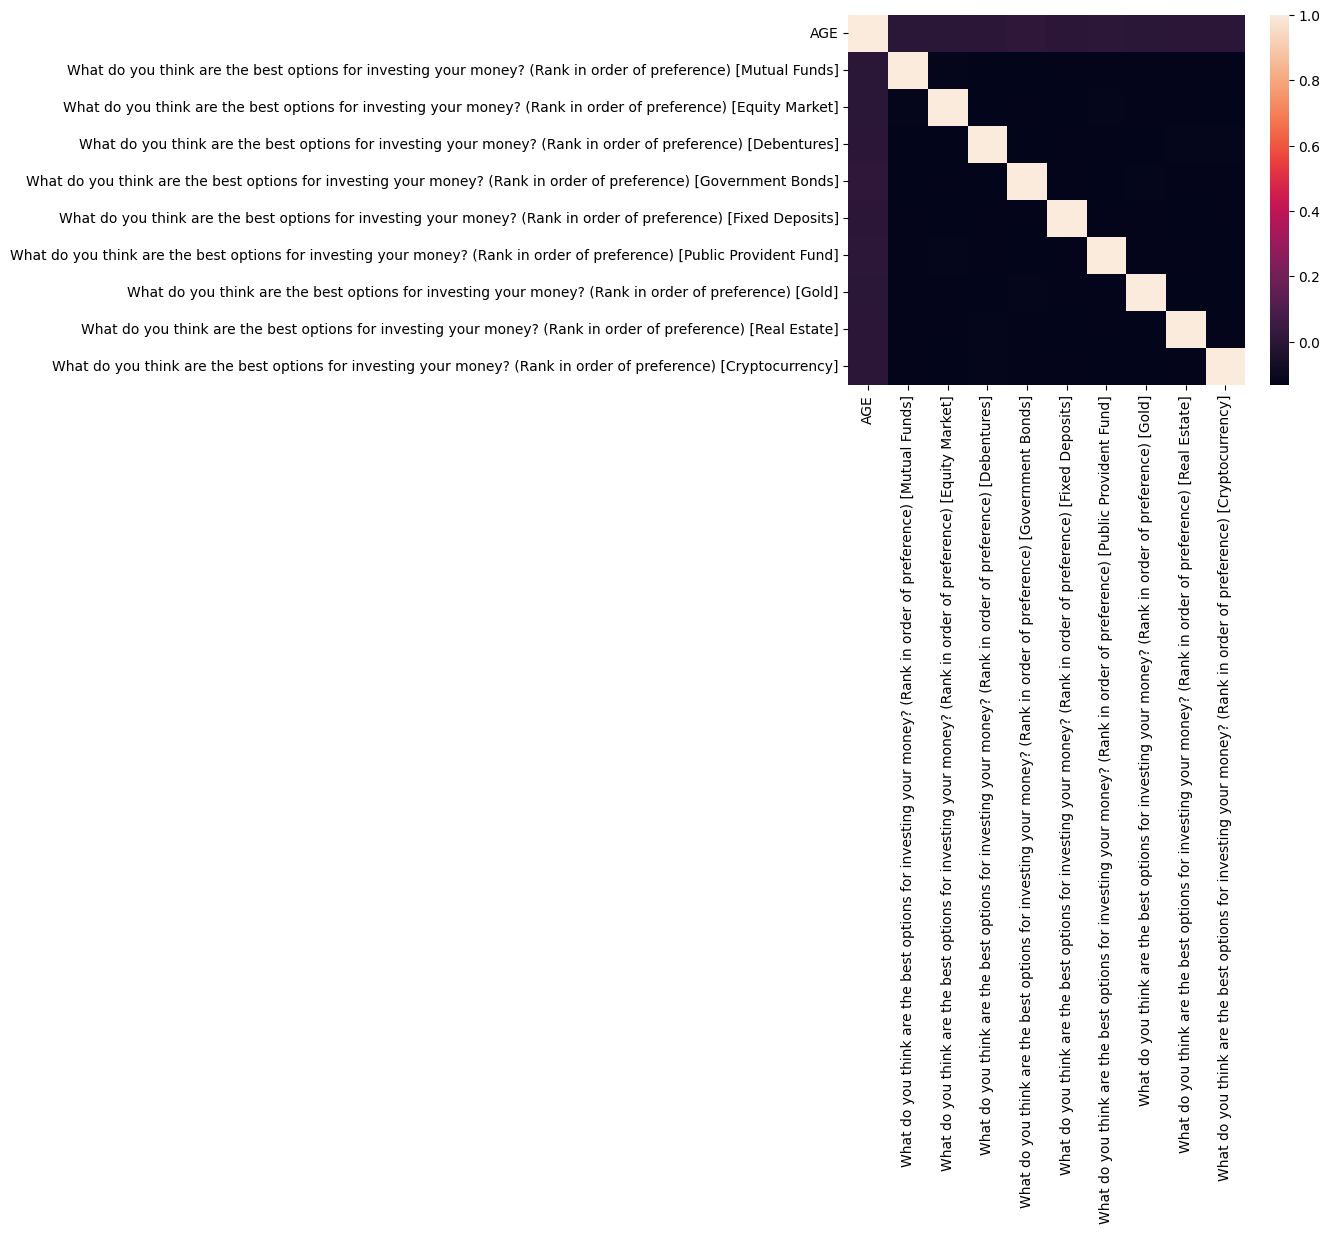

In [17]:
sns.heatmap(invest_data.corr())

In [18]:
fig = px.histogram (invest_data, x = "AGE",  facet_row = "Which investment avenue do you mostly invest in?",  template = 'plotly_dark')
fig.show ()

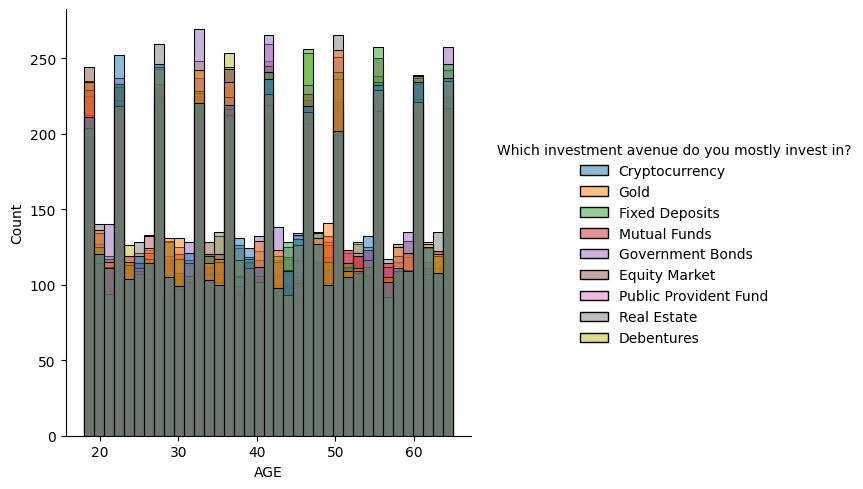

In [19]:
sns.displot(x='AGE',data=invest_data[invest_data['GENDER']=='Female'],hue='Which investment avenue do you mostly invest in?')


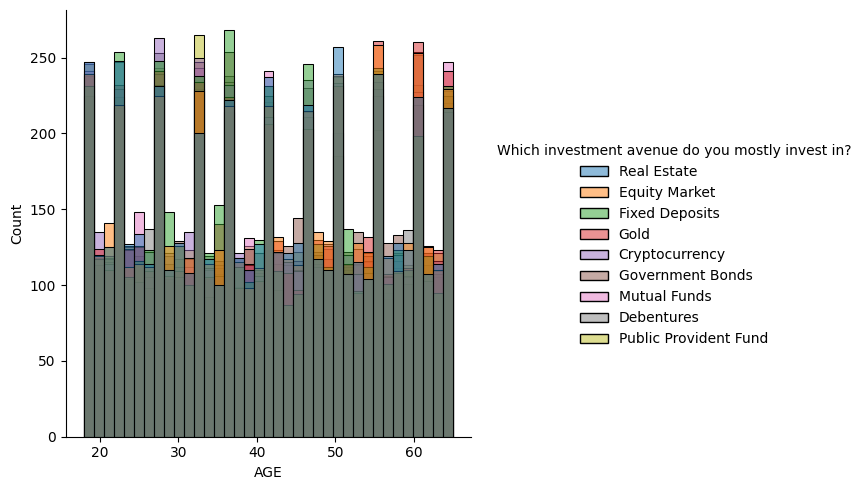

In [20]:
sns.displot(x='AGE',data=invest_data[invest_data['GENDER']=='Male'],hue='Which investment avenue do you mostly invest in?')


<Axes: xlabel='Which investment avenue do you mostly invest in?', ylabel='AGE'>

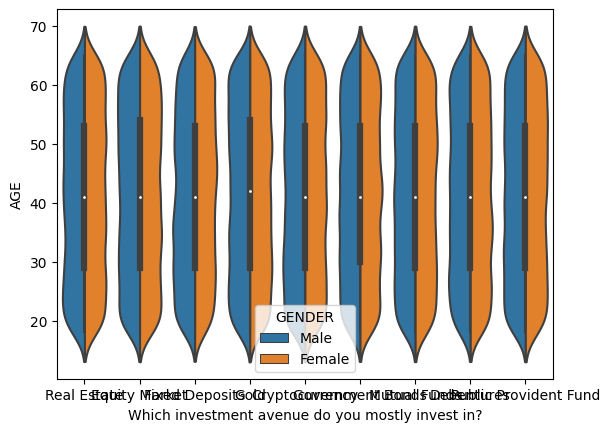

In [21]:
sns.violinplot(x='Which investment avenue do you mostly invest in?', y='AGE', data=invest_data,
               hue='GENDER', split=True)

### DATA PRE


In [22]:
# encoding sex column
invest_data.replace({'GENDER':{'Male':0,'Female':1}}, inplace=True)

3 # encoding 'smoker' column
invest_data.replace({'Do you invest in Investment Avenues?':{'Yes':0,'No':1}}, inplace=True)

# encoding 'region' column
invest_data.replace({'Do you invest in Stock Market?':{'Yes':0,'No':1}}, inplace=True)

invest_data.replace({'Your sources of information for investments is':{"Newspapers and Magazines": 0,"Internet": 1,"Financial Consultants": 2,"Television": 3,"Friends and Family": 4}}, inplace=True)

invest_data.replace({'Reasons for investing in Fixed Deposits':{
    "Risk Free": 0,
    "High Interest Rates": 1,
    "Fixed Returns": 2
}
}, inplace=True)

invest_data.replace({'Reasons for investing in Government Bonds':{
    "Safe Investment": 0,
    "Tax Incentives": 1 , 
    "Assured Returns":2
}
}, inplace=True)

invest_data.replace({'Reasons for investing in Mutual Funds':{
    "Better Returns": 0,
    "Tax Benefits": 1,
    "Fund Diversification": 2
}
}, inplace=True)

invest_data.replace({'Reasons for investing in Equity Market':{
    "Capital Appreciation": 0,
    "Dividend": 1,
    "Liquidity": 2
}
}, inplace=True)

invest_data.replace({'What are your savings objectives?':{
    "Retirement Plan": 0,
    "Health Care": 1,
    "Education": 2
}
}, inplace=True)

invest_data.replace({'Which investment avenue do you mostly invest in?':{
"Mutual Funds": 0,
"Equity Market": 1,
"Debentures": 2,
"Government Bonds": 3,
"Fixed Deposits": 4,
"Public Provident Fund": 5,
"Gold": 6 , 
"Real Estate": 7 ,
"Cryptocurrency": 8
}
}, inplace=True)

invest_data.replace({'How much return do you expect from any investment instrument?':{
"10%-20%": 0,
"20%-30%": 1,
"30%-40%": 2
}
}, inplace=True)

invest_data.replace({'How frequently do you monitor your investments?':{
"Daily": 0,
"Weekly": 1,
"Monthly": 2,
"Quarterly": 3,
"Yearly": 4
}
}, inplace=True)

invest_data.replace({'How long do you prefer to keep your money in any investment instrument?':{
"Less than 1 year": 0,
"1-3 years": 1,
"3-5 years": 2,
"More than 5 years": 3
}
}, inplace=True)

invest_data.replace({'What is your purpose behind investment?':{
"Wealth Creation": 0,
"Savings for Future": 1,
"Returns": 2
}
}, inplace=True)

invest_data.replace({'What are your investment objectives?':{
"Capital Appreciation": 0,
"Income": 1,
"Growth": 2
}
}, inplace=True)

invest_data.replace({'What are the factors considered by you while investing in any instrument?':{
"Returns": 0,
"Locking Period": 1,
"Risk": 2
}
}, inplace=True)

invest_data.replace({'Do you invest in Stock Market?':{'Yes':0,'No':1}
}, inplace=True)




In [23]:
invest_data.head()

GENDER  AGE  Do you invest in Investment Avenues?  \
0       0   50                                     1   
1       0   54                                     0   
2       0   43                                     0   
3       0   34                                     0   
4       0   48                                     0   

   What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]  \
0                                                  2                                                               
1                                                  4                                                               
2                                                  5                                                               
3                                                  1                                                               
4                                                  4                                                               

   What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market]  \
0                                                  8                                                                
1                                                  2                                                                
2                                                  1                                                                
3                                                  8                                                                
4                                                  6                                                                

   What do you think are the best options for investing your money? (Rank in order of preference) [Debentures]  \
0                                                  6                                                             
1                                                  7                                                             
2                                                  6                                                             
3                                                  6                                                             
4                                                  5                                                             

   What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds]  \
0                                                  3                                                                   
1                                                  6                                                                   
2                                                  7                                                                   
3                                                  4                                                                   
4                                                  7                                                                   

   What do you think are the best options for investing your money? (Rank in order of preference) [Fixed Deposits]  \
0                                                  9                                                                 
1                                                  5                                                                 
2                                                  2                                                                 
3                                                  5                                                                 
4                                                  9                                                                 

   What do you think are the best options for investing your money? (Rank in order of preference) [Public Provident Fund]  \
0                         

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [25]:
invest_data['Which investment avenue do you mostly invest in?'].value_counts()

7    11308
6    11218
4    11210
3    11125
1    11095
2    11032
0    11022
8    11006
5    10984
Name: Which investment avenue do you mostly invest in?, dtype: int64

In [26]:
#splitting features
X = invest_data.drop('Which investment avenue do you mostly invest in?',axis=1)    #axis=1 when dropping column       
y = invest_data['Which investment avenue do you mostly invest in?']   
print(X)

       GENDER  AGE  Do you invest in Investment Avenues?  \
0           0   50                                     1   
1           0   54                                     0   
2           0   43                                     0   
3           0   34                                     0   
4           0   48                                     0   
...       ...  ...                                   ...   
99995       0   42                                     1   
99996       1   59                                     0   
99997       0   30                                     1   
99998       0   35                                     0   
99999       1   40                                     0   

       What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]  \
0                                                      2                                                               
1                                      

In [27]:
print(y)

0        7
1        7
2        1
3        4
4        6
        ..
99995    4
99996    2
99997    7
99998    4
99999    4
Name: Which investment avenue do you mostly invest in?, Length: 100000, dtype: int64


In [28]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3,random_state=42)
print(X.shape , X_train.shape , X_test.shape)

(100000, 25) (70000, 25) (30000, 25)


In [29]:
len(X_train), len(X_test)

(70000, 30000)

### **RandomForestClassifier**

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train , y_train)

RandomForestClassifier()

In [31]:
#accuracy on testing 
X_test_prediction_rf = rf.predict(X_test)
testing_data_accuracy_rf = accuracy_score(X_test_prediction_rf, y_test)
print('Accuracy on Testing Data:', testing_data_accuracy_rf)

Accuracy on Testing Data: 0.11096666666666667


In [32]:
#accuracy on training 
X_train_prediction_rf = rf.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf, y_train)
print('Accuracy on Training Data:', training_data_accuracy_rf)

Accuracy on Training Data: 1.0


### KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
#accuracy on training 
X_train_prediction_knn = knn.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction_knn, y_train)
print('Accuracy on Training Data:', training_data_accuracy_knn)

Accuracy on Training Data: 0.3718


In [35]:
#accuracy on testing 
X_test_prediction_knn = knn.predict(X_test)
testing_data_accuracy_knn = accuracy_score(X_test_prediction_knn, y_test)
print('Accuracy on Testing Data:', testing_data_accuracy_knn)

Accuracy on Testing Data: 0.1098


### Logistic Regression


In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [37]:
#accuracy on training 
X_train_prediction = lr.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training Data:', training_data_accuracy)

Accuracy on Training Data: 0.11948571428571429


In [38]:
#accuracy on testing
X_test_prediction = lr.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy on Testing Data:', testing_data_accuracy)

Accuracy on Testing Data: 0.10803333333333333


### DecisionTreeClassifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
#accuracy on training 
X_train_prediction_dt = dt.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction_dt, y_train)
print('Accuracy on Training Data:', training_data_accuracy_dt)

Accuracy on Training Data: 1.0


In [41]:
#accuracy on testing 
X_test_prediction_dt = dt.predict(X_test)
testing_data_accuracy_dt = accuracy_score(X_test_prediction_dt, y_test)
print('Accuracy on Testing Data:', testing_data_accuracy_dt)

Accuracy on Testing Data: 0.1111


## Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [43]:
#accuracy on training 
X_train_prediction_nb_classifier = nb_classifier.predict(X_train)
training_data_accuracy_nb_classifier = accuracy_score(X_train_prediction_nb_classifier, y_train)
print('Accuracy on Training Data:', training_data_accuracy_nb_classifier)

Accuracy on Training Data: 0.12578571428571428


In [44]:
#accuracy on testing 
X_test_prediction_nb_classifier = nb_classifier.predict(X_test)
testing_data_accuracy_nb_classifier = accuracy_score(X_test_prediction_nb_classifier, y_test)
print('Accuracy on Testing Data:', testing_data_accuracy_nb_classifier)

Accuracy on Testing Data: 0.10923333333333334


In [45]:
input_data=(0,34,0,1,8,6,4,5,7,3,2,9,0,2,1,0,3,3,2,0,0,1,0,1,1)
#change input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping numpy array for predicting only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print ("Mutual Funds")
elif(prediction[0]==1):
    print('Equity Market')
elif(prediction[0]==2):
    print('Debentures')
elif(prediction[0]==3):
    print('Government Bonds')
elif(prediction[0]==4):
    print('Fixed Deposits')
elif(prediction[0]==5):
    print('Public Provident Fund')
elif(prediction[0]==6):
    print('Gold')
elif(prediction[0]==7):
    print('Real Estate')
elif(prediction[0]==8):
    print('Cryptocurrency')


[4]
Fixed Deposits


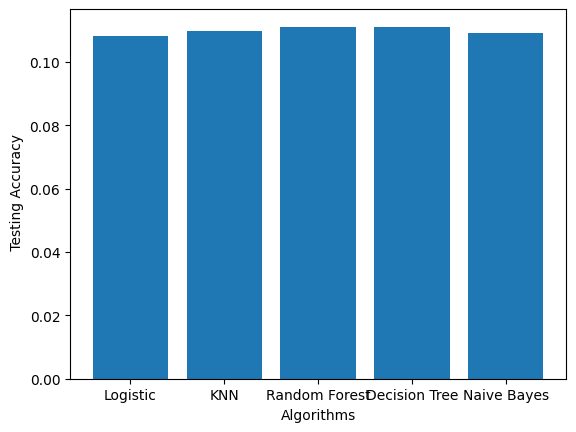

In [46]:
plt.bar(['Logistic','KNN','Random Forest','Decision Tree','Naive Bayes'],[testing_data_accuracy,testing_data_accuracy_knn,testing_data_accuracy_rf,testing_data_accuracy_dt,testing_data_accuracy_nb_classifier])
plt.xlabel("Algorithms")
plt.ylabel(" Testing Accuracy")
plt.show()

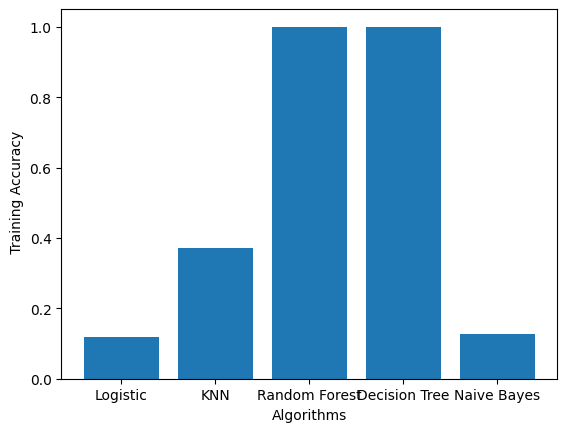

In [47]:
plt.bar(['Logistic','KNN','Random Forest','Decision Tree','Naive Bayes'],[training_data_accuracy,training_data_accuracy_knn,training_data_accuracy_rf,training_data_accuracy_dt,training_data_accuracy_nb_classifier])
plt.xlabel("Algorithms")
plt.ylabel(" Training Accuracy")
plt.show()

In [48]:
a = invest_data.iloc[:,np.r_[1:5,9:11,13:15]].values
b = invest_data.iloc[:,12].values

print(a)

[[50  1  2 ...  1  1  0]
 [54  0  4 ...  1  2  0]
 [43  0  5 ...  3  0  0]
 ...
 [30  1  9 ...  4  1  2]
 [35  0  5 ...  9  2  2]
 [40  0  7 ...  8  1  2]]


In [49]:
print(b)

[0 1 0 ... 0 1 1]


In [50]:
print("per of missing gender is %2f%%" %((invest_data['GENDER'].isnull().sum()/invest_data.shape[0])*100))

per of missing gender is 0.000000%


Number of people who invest as group by Gender:
0    50094
1    49906
Name: GENDER, dtype: int64


<Axes: xlabel='GENDER', ylabel='count'>

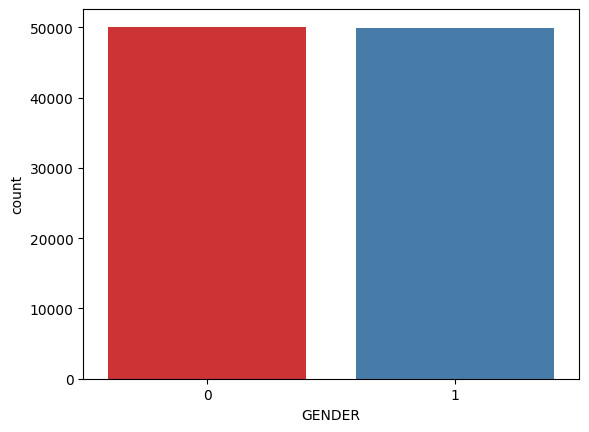

In [51]:
print("Number of people who invest as group by Gender:")
print(invest_data['GENDER'].value_counts())
sns.countplot(x='GENDER', data=invest_data, palette = 'Set1')

Total number of purposes behind investment?:
0    33449
1    33290
2    33261
Name: What is your purpose behind investment?, dtype: int64


<Axes: xlabel='What is your purpose behind investment?', ylabel='count'>

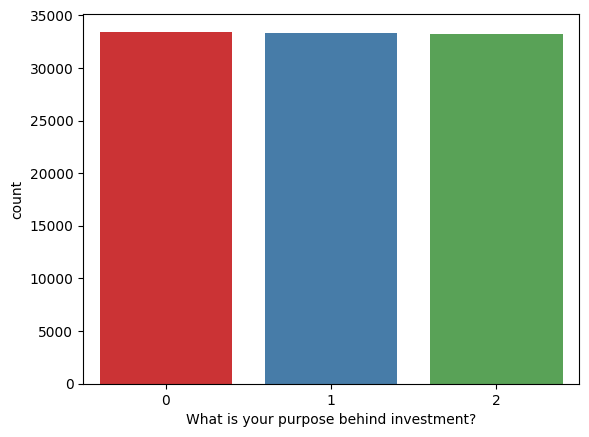

In [52]:
print("Total number of purposes behind investment?:")
print(invest_data['What is your purpose behind investment?'].value_counts())
sns.countplot(x='What is your purpose behind investment?', data=invest_data, palette = 'Set1')

In [53]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_a = LabelEncoder()

In [54]:
for i in range(0,5):
  a_train[:,i] = Labelencoder_a.fit_transform(a_train[:,i])
  a_train[:,7] = Labelencoder_a.fit_transform(a_train[:,7])

a_train

array([[ 0,  0,  5, ...,  7,  2,  2],
       [22,  1,  1, ...,  5,  1,  0],
       [26,  0,  2, ...,  4,  1,  0],
       ...,
       [20,  1,  8, ...,  5,  2,  2],
       [39,  1,  4, ...,  9,  1,  1],
       [45,  1,  3, ...,  5,  2,  0]])

In [55]:
Labelencoder_b = LabelEncoder()
b_train = Labelencoder_b.fit_transform(b_train)

b_train

array([1, 0, 1, ..., 0, 0, 1])

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(a_train, b_train)

RandomForestClassifier()

In [57]:
from sklearn import metrics 
b_pred = rf_clf.predict(a_test)

print("accuracy of random forest clf is", metrics.accuracy_score(b_pred, b_test))

b_pred

accuracy of random forest clf is 0.4987


array([0, 1, 1, ..., 0, 1, 0])

In [58]:
a_train_prediction = rf_clf.predict(a_train)
training_data_accuracy = accuracy_score(a_train_prediction, b_train)
print('Accuracy on Training Data:', training_data_accuracy)

Accuracy on Training Data: 0.9920125


In [59]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(a_train, b_train)

GaussianNB()

In [60]:
b_pred = nb_classifier.predict(a_test)
print("acc of gaussianNB is %.", metrics.accuracy_score(b_pred, b_test))

acc of gaussianNB is %. 0.49525


In [61]:
a_train_prediction = nb_classifier.predict(a_train)
training_data_accuracy = accuracy_score(a_train_prediction, b_train)
print('Accuracy on Training Data:', training_data_accuracy)

Accuracy on Training Data: 0.5039375


In [62]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(a_train, b_train)

DecisionTreeClassifier()

In [63]:
b_pred = dt_clf.predict(a_test)
print("Accuracy of Decision Tree is", metrics.accuracy_score(b_pred, b_test))

Accuracy of Decision Tree is 0.49905


In [64]:
a_train_prediction = dt_clf.predict(a_train)
training_data_accuracy = accuracy_score(a_train_prediction, b_train)
print('Accuracy on Training Data:', training_data_accuracy)

Accuracy on Training Data: 0.9920125


In [65]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(a_train, b_train)

KNeighborsClassifier()

In [66]:
b_pred = kn_clf.predict(a_test)
print("Accuracy of KN is", metrics.accuracy_score(b_pred, b_test))

Accuracy of KN is 0.5031


In [67]:
a_train_prediction = kn_clf.predict(a_train)
training_data_accuracy = accuracy_score(a_train_prediction, b_train)
print('Accuracy on Training Data:', training_data_accuracy)

Accuracy on Training Data: 0.68825


In [68]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(a_train, b_train)

GaussianNB()